# Flight Fare Prediction

## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

## Feature Engineering with EDA

'Date_of_Journey' is an object data type. We will have to convert it into timestamp so that we can use it..

In [11]:
df['Journey Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [12]:
df['Journey Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
# We can drop 'Date_of_Journey' now..
df.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

df['Dep hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep min'] = pd.to_datetime(df['Dep_Time']).dt.minute

# We can drop original feature now

df.drop('Dep_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Dep hr,Dep min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
# Arrival time is when the reaches the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

df['Arr hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# We can drop original feature now

df.drop('Arrival_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Dep hr,Dep min,Arr hr,Arr min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Duration is Time taken by plane to reach destination
# It is the difference betwwen Departure Time and Arrival time

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [19]:
# Adding duration_hours and duration_mins list to dataframe

df["Duration hrs"] = duration_hours
df["Duration min"] = duration_mins
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Dep hr,Dep min,Arr hr,Arr min,Duration hrs,Duration min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [20]:
df.drop(["Duration"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Day,Journey Month,Dep hr,Dep min,Arr hr,Arr min,Duration hrs,Duration min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Now we will handle categorical data...

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case<br>
**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [21]:
#Airline vs Price
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

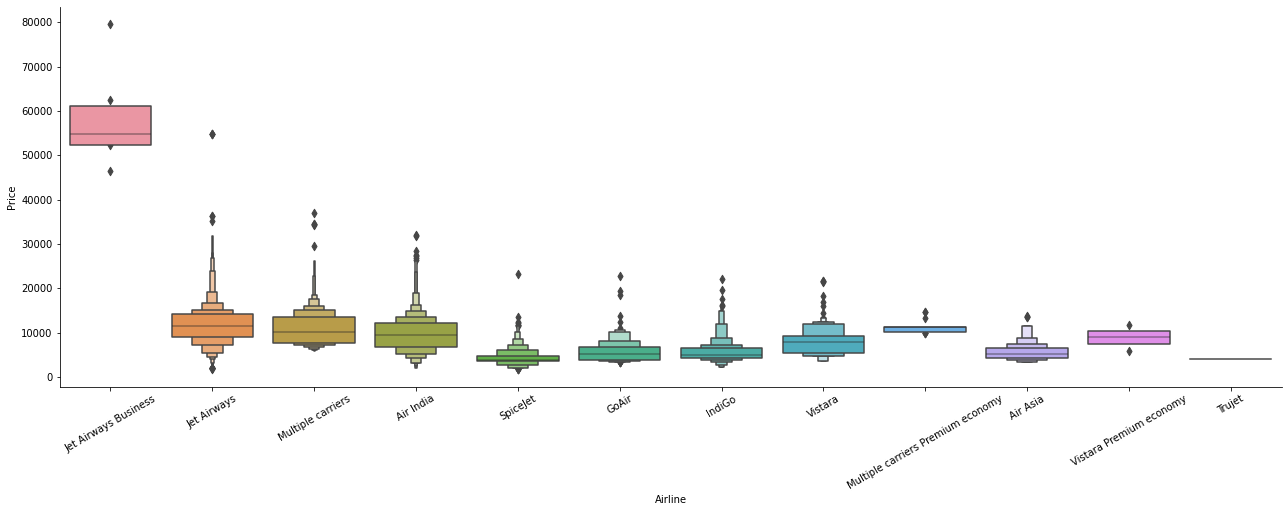

In [22]:
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation=30)
plt.show()

Here we can see that jet airways business class is costly and others are almost having same range

In [23]:
# We will do OHE for Airline as it is nominal feature
airline = df['Airline']

airline = pd.get_dummies(airline, drop_first=True)

airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

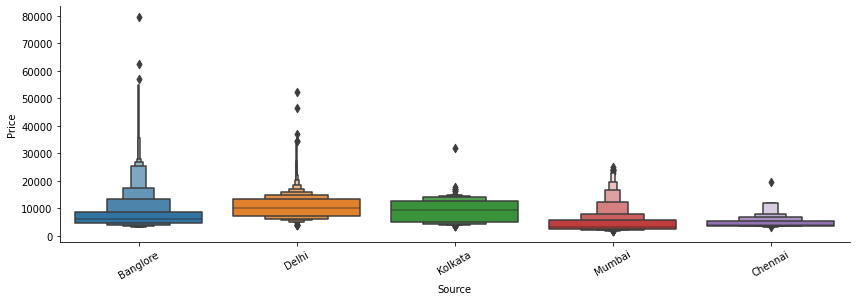

In [25]:
# Source vs Price

sns.catplot(y="Price",x="Source",data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.xticks(rotation=30)
plt.show()

In [26]:
# As Source is Nominal Categorical data we will perform OHE

source = df[["Source"]]

source = pd.get_dummies(source, drop_first= True)

source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

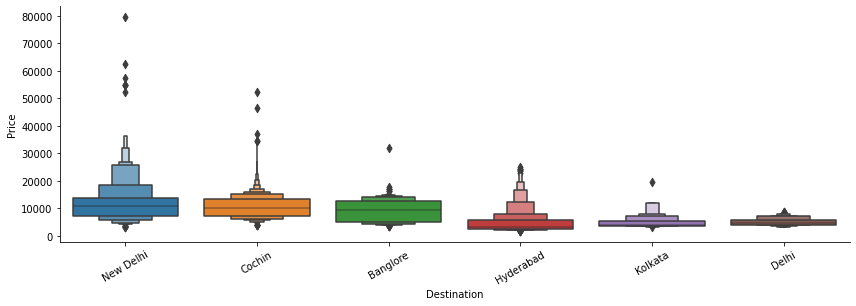

In [28]:
# Destination vs Price

sns.catplot(y="Price",x="Destination",data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.xticks(rotation=30)
plt.show()

In [29]:
# As Destination is Nominal Categorical data we will perform OHE

destination = df['Destination']

destination = pd.get_dummies(destination, drop_first= True)

destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [30]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
#Here as we can see that it this column has no information for almost all records, we can drop this
df.drop('Additional_Info',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey Day,Journey Month,Dep hr,Dep min,Arr hr,Arr min,Duration hrs,Duration min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,16,50,21,35,4,45


In [32]:
#Route and Total Stops are interrelated. So wecan drop Route column and work on total_stops feature
df.drop('Route',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey Day,Journey Month,Dep hr,Dep min,Arr hr,Arr min,Duration hrs,Duration min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [33]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

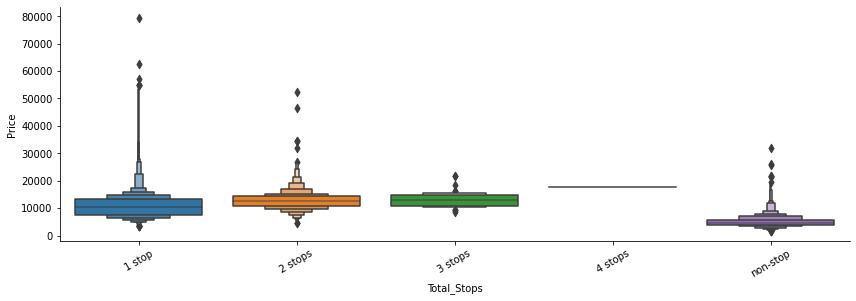

In [34]:
# This is a ordinal variable so we will use label encoder for this. Also let's visualize this
# Stops vs Price

sns.catplot(y="Price",x="Total_Stops",data = df.sort_values("Total_Stops"), kind="boxen", height = 4, aspect = 3)
plt.xticks(rotation=30)
plt.show()

In [35]:
# here we can see that as stops are increasing,the price is increasing slightly
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [36]:
# Now we will concatenate our categorical feature with original dataframe
final_df = pd.concat([df, airline, source, destination], axis = 1)
final_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey Day,Journey Month,Dep hr,Dep min,Arr hr,Arr min,Duration hrs,Duration min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
final_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [38]:
final_df.head()

,Total_Stops,Price,Journey Day,Journey Month,Dep hr,Dep min,Arr hr,Arr min,Duration hrs,Duration min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
final_df.shape

(10682, 30)

In [40]:
train_df = final_df.copy()

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey Day                        10682 non-null  int64
 3   Journey Month                      10682 non-null  int64
 4   Dep hr                             10682 non-null  int64
 5   Dep min                            10682 non-null  int64
 6   Arr hr                             10682 non-null  int64
 7   Arr min                            10682 non-null  int64
 8   Duration hrs                       10682 non-null  int64
 9   Duration min                       10682 non-null  int64
 10  Air India                          10682 non-null  uint8
 11  GoAir                              10682 non-null  uint8
 12  IndiGo            

## Now we will convert our Test Set which is a different excel file

In [42]:
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_df.info())

print()
print()

print("Null values :")
print("-"*75)
test_df.dropna(inplace = True)
print(test_df.isnull().sum())

# Feature Engineering

# Date_of_Journey
test_df["Journey Day"] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day
test_df["Journey Month"] = pd.to_datetime(test_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_df["Dep hr"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_df["Arr hr"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arr min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_df["Duration hrs"] = duration_hours
test_df["Duration min"] = duration_mins
test_df.drop(["Duration"], axis = 1, inplace = True)

#Categorical data
print("Airline")
print("-"*75)
print(test_df["Airline"].value_counts())
Airline = pd.get_dummies(test_df["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_df["Source"].value_counts())
Source = pd.get_dummies(test_df["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_df["Destination"].value_counts())
Destination = pd.get_dummies(test_df["Destination"], drop_first = True)

test_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

final_test = pd.concat([test_df, Airline, Source, Destination], axis = 1)


final_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", final_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [44]:
final_test.head()

,Total_Stops,Journey Day,Journey Month,Dep hr,Dep min,Arr hr,Arr min,Duration hrs,Duration min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey Day                        2671 non-null   int64
 2   Journey Month                      2671 non-null   int64
 3   Dep hr                             2671 non-null   int64
 4   Dep min                            2671 non-null   int64
 5   Arr hr                             2671 non-null   int64
 6   Arr min                            2671 non-null   int64
 7   Duration hrs                       2671 non-null   int64
 8   Duration min                       2671 non-null   int64
 9   Air India                          2671 non-null   uint8
 10  GoAir                              2671 non-null   uint8
 11  IndiGo                             2671 non-null   uint8
 12  Jet Airways         

## Feature Selection<br>
Following are some of methods:

**heatmap**<br>
**feature_importance_**<br>
**SelectKBest**<br>

In [46]:
train_df.shape

(10682, 30)

In [47]:
train_df.columns

Index(['Total_Stops', 'Price', 'Journey Day', 'Journey Month', 'Dep hr',
       'Dep min', 'Arr hr', 'Arr min', 'Duration hrs', 'Duration min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [48]:
X = train_df.loc[:, ['Total_Stops', 'Journey Day', 'Journey Month', 'Dep hr',
       'Dep min', 'Arr hr', 'Arr min', 'Duration hrs', 'Duration min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi']]
X.head()

,Total_Stops,Journey Day,Journey Month,Dep hr,Dep min,Arr hr,Arr min,Duration hrs,Duration min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
y = train_df.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

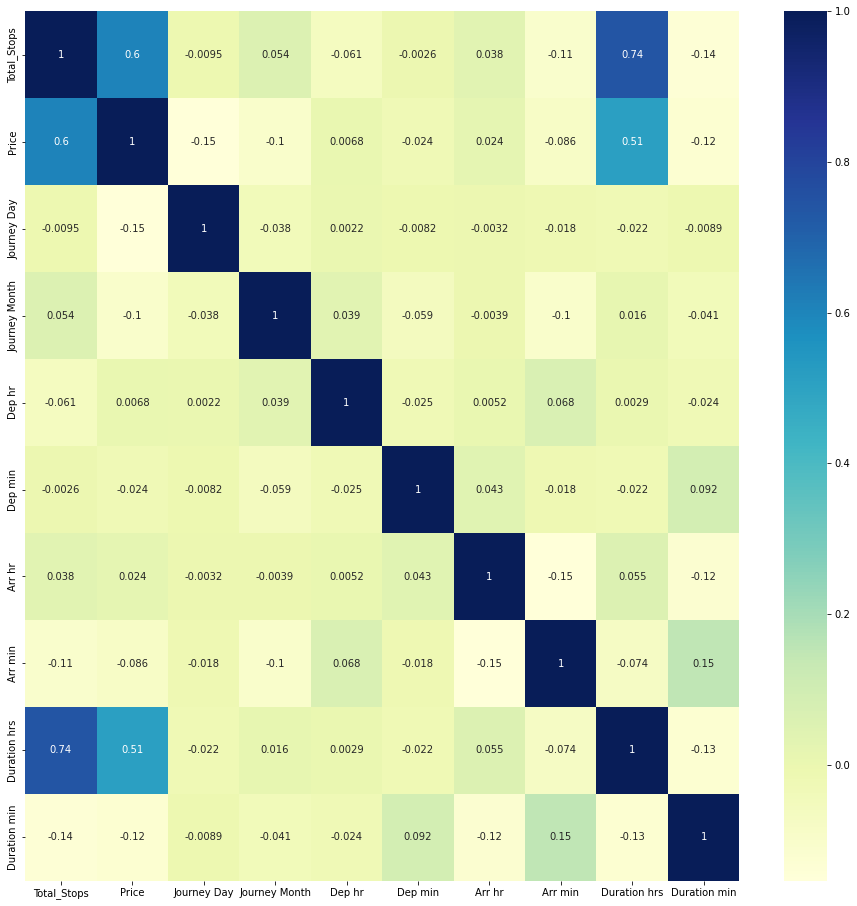

In [50]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [51]:
#Important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[2.23630777e-01 1.45210471e-01 5.31400807e-02 2.46118011e-02
 2.12420934e-02 2.71277769e-02 1.84250154e-02 1.20909240e-01
 1.80518464e-02 9.04284390e-03 1.76597649e-03 1.86004140e-02
 1.41785497e-01 6.73797517e-02 1.98236822e-02 8.03665750e-04
 3.28171314e-03 1.11862537e-04 4.98579499e-03 8.96712140e-05
 3.51543668e-04 1.05723163e-02 2.97740534e-03 6.51713417e-03
 1.03529813e-02 1.52285611e-02 8.52042627e-03 5.10157271e-04
 2.49494999e-02]


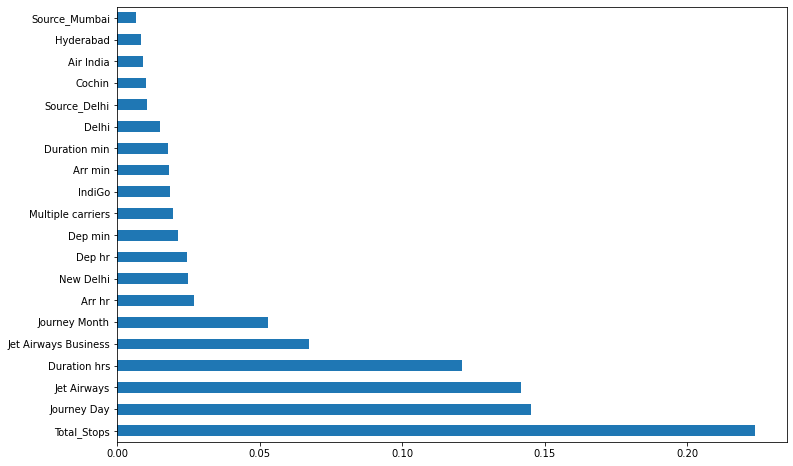

In [53]:
#Plotting graph of feature importances for better visualization
plt.figure(figsize = (12,8))

feature_importances = pd.Series(selection.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

Note : Scaling is not required here as we are going to fit an ensemble model

## Building Model:

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
y_pred = reg_rf.predict(X_test)

In [57]:
from sklearn.metrics import r2_score

In [58]:
r2_score(y_test,y_pred)

0.7946444664549245

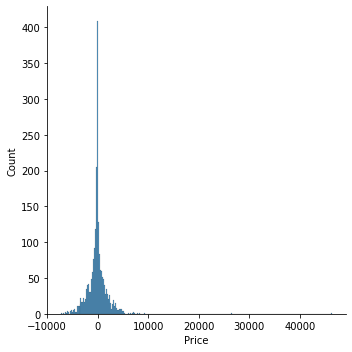

In [59]:
sns.displot(y_test-y_pred)

## Hyper-Parameter Tuning:

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

In [62]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [63]:
rf_random = RandomizedSearchCV(estimator = reg_rf,
                               param_distributions = random_grid,
                               scoring='r2',
                               n_iter = 5,
                               cv = 5,
                               verbose=1,
                               n_jobs=-1)

In [64]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='r2', verbose=1)

In [65]:
rf_random.best_params_

{'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 15}

In [66]:
prediction = rf_random.predict(X_test)

C:\Users\Pratik\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


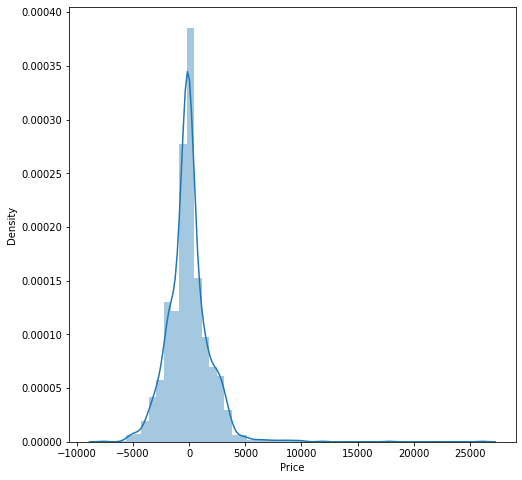

In [67]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [68]:
r2_score(y_test,prediction)

0.829861428309685

In [69]:
# We will created our final RF model using our best parameters
final_rf = RandomForestRegressor(n_estimators= 600,
                                 max_features= 'sqrt',
                                 max_depth=30)

In [70]:
final_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=600)

In [71]:
y_pred_final = final_rf.predict(X_test)

In [72]:
r2_score(y_test,y_pred_final)

0.8181782846396377

## Saving the model

In [73]:
import pickle

# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)        

In [74]:
model = open('model.pkl','rb')
predictor = pickle.load(model)

In [75]:
loaded_pred = predictor.predict(X_test)

In [76]:
loaded_pred

array([16910.21      ,  5578.71      ,  8966.7       , ...,
        6707.84      , 12971.425     , 12883.45872619])

In [77]:
r2_score(y_test,loaded_pred)

0.7946444664549245